<a href="https://colab.research.google.com/github/HarshitSahni18/TASKS/blob/main/Harshit_Sahni_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Step 1: Load and Merge Data
In this step, we:

 Load customer and transaction data  
 Merge them to create a **customer profile dataset**  
 Prepare data for clustering  


In [1]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load datasets
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')

# Convert date columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge transaction data with customer details
df = transactions.merge(customers, on='CustomerID', how='left')

# Display merged dataset
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


### Step 2: Feature Engineering
We will:

 Convert categorical data to numerical  
 Aggregate **transaction history per customer**  
 Normalize features for clustering  


In [2]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_enc = LabelEncoder()
df['Region'] = label_enc.fit_transform(df['Region'])

# Aggregate customer transaction data
customer_features = df.groupby('CustomerID').agg({
    'Region': 'first',
    'SignupDate': 'first',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Convert SignupDate to numeric (days since first signup)
customer_features['SignupDate'] = (customer_features['SignupDate'] - customer_features['SignupDate'].min()).dt.days

# Display processed features
customer_features.head()


,CustomerID,Region,SignupDate,TotalValue,Quantity
0,C0001,3,169,3354.52,12
1,C0002,0,22,1862.74,10
2,C0003,3,775,2725.38,14
3,C0004,3,260,5354.88,23
4,C0005,0,205,2034.24,7


### Step 3: Apply Clustering Algorithm
We will:
 Standardize the dataset  
 Apply **K-Means Clustering** (or another algorithm)  
 Find the optimal **number of clusters (2-10)**  


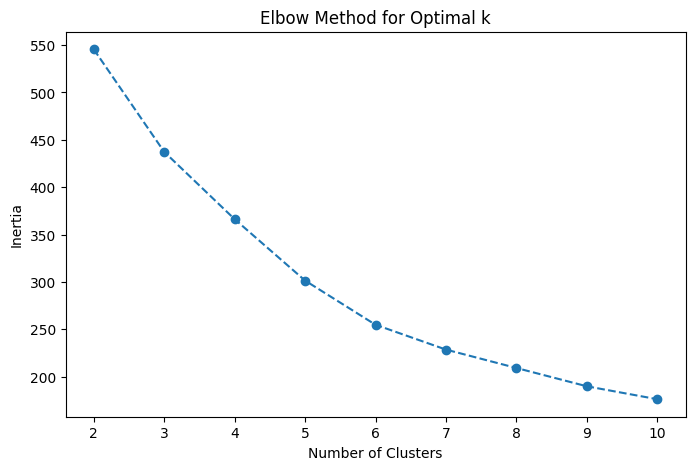

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.drop(columns=['CustomerID']))

# Find the optimal number of clusters using the Elbow Method
inertia = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8,5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Step 4: Evaluate Clustering
We calculate:
 **Davies-Bouldin Index (DB Index)** to measure cluster quality  
 Other clustering metrics (optional)  


In [4]:
from sklearn.metrics import davies_bouldin_score

# Choose the optimal number of clusters (based on the elbow method)
optimal_clusters = 4  # Change this based on the elbow method graph

# Apply K-Means with the chosen k
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Compute DB Index
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index:.4f}")


Davies-Bouldin Index: 1.1493


### Step 5: Visualize Clusters
We will:
 Use **scatter plots** to show customer clusters  
 Color customers by their assigned cluster  


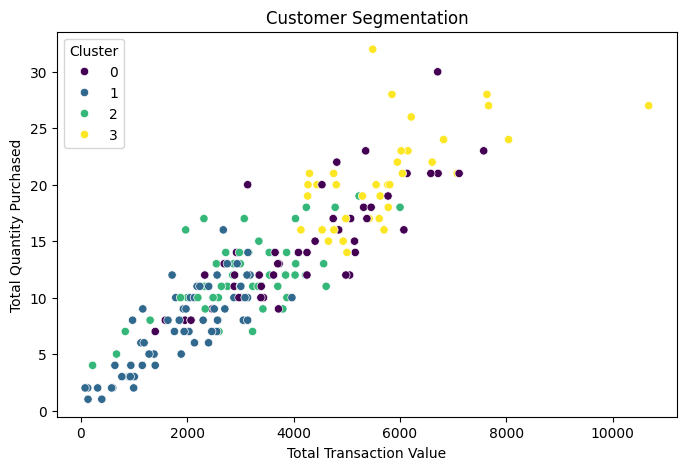

In [5]:
# Scatter plot of clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['Quantity'],
                hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Transaction Value')
plt.ylabel('Total Quantity Purchased')
plt.show()


### Step 6: Save Clustering Results
Now, we save the final **segmentation.csv** file, containing:
 CustomerID  
 Cluster assignment  
 Total transaction value  
 Quantity purchased  


In [6]:
# Save results to CSV
customer_features[['CustomerID', 'Cluster', 'TotalValue', 'Quantity']].to_csv('/content/drive/MyDrive/Clustering.csv', index=False)
print("Clustering results saved successfully!")


Clustering results saved successfully!
